In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#loading the data
data = pd.read_csv('data.csv')
#viewing data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
#Exploring the Data
data.shape
#Viewing data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
#dropping the column Unnamed and id as unnamed column contains NaN values and we don't need id column
data.drop(['Unnamed: 32', 'id'], axis = 1, inplace = True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#replacing the M or B in diagnosis to 0 and 1
data['diagnosis'] = data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


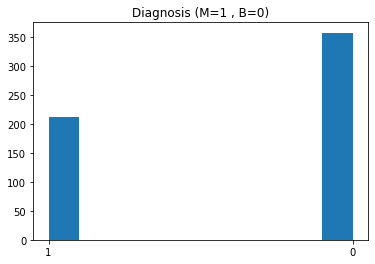

In [5]:
#Data Visualization
data.describe()
plt.hist(data['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

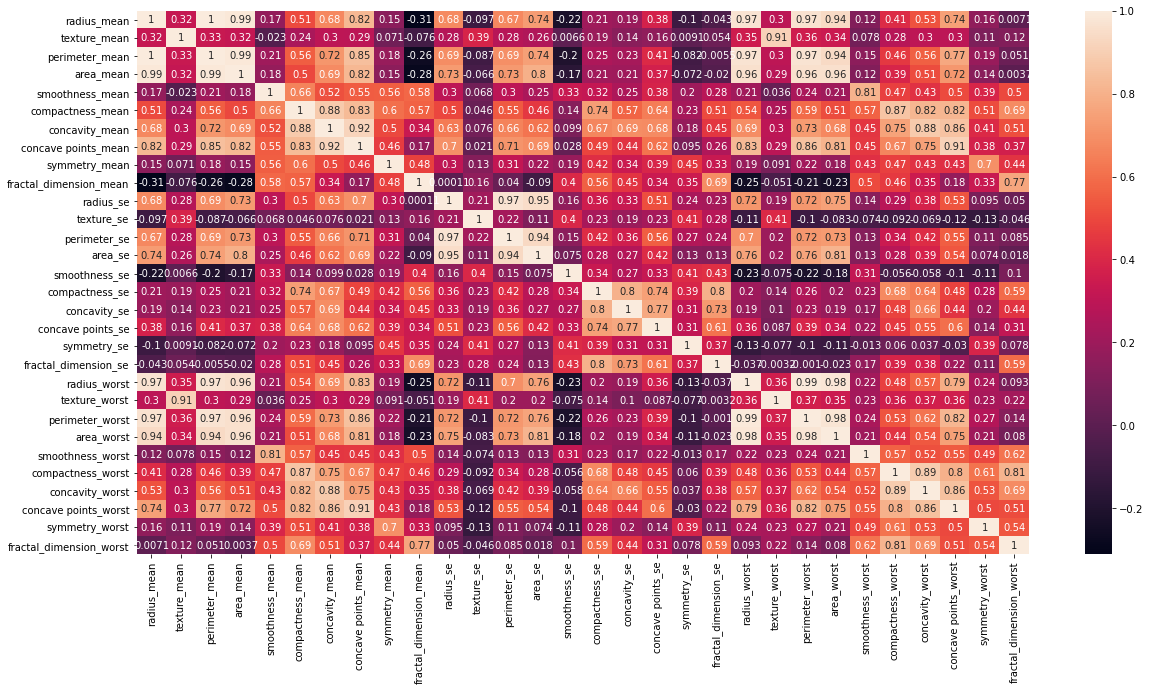

In [6]:
#Correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.ioff()

In [7]:
#Defining X and y variable
from sklearn.model_selection import train_test_split
from sklearn import metrics
Y= data['diagnosis']
X = data.drop(columns =['diagnosis'])
#Split train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [8]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)


 Confusion matrix



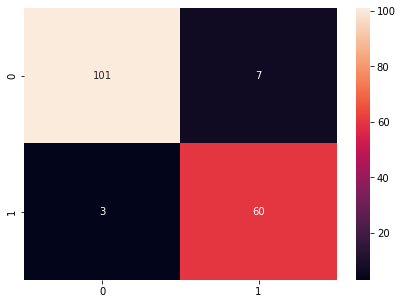

Classification report
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       108
           1       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

Accuracy of the Decision Tree model :  94.15204678362574


In [9]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,Y_train)
# Predicting the Test set results
Y_pred = dt.predict(X_test)
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print('\n','Confusion matrix\n')
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print("Classification report\n",metrics.classification_report(Y_test, Y_pred))
print("Accuracy of the Decision Tree model : ", metrics.accuracy_score(Y_test, Y_pred)*100)


 Confusion matrix



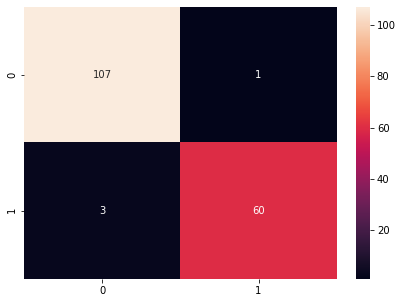

Classification report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Accuracy of the Random Forest model :  97.6608187134503


In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=5, n_estimators=470, n_jobs=-1)
rf.fit(X_train, Y_train)
# Predicting the Test set results
Y_pred = rf.predict(X_test)
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print('\n','Confusion matrix\n')
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print("Classification report\n",metrics.classification_report(Y_test, Y_pred))
print("Accuracy of the Random Forest model : ", metrics.accuracy_score(Y_test, Y_pred)*100)


 Confusion matrix



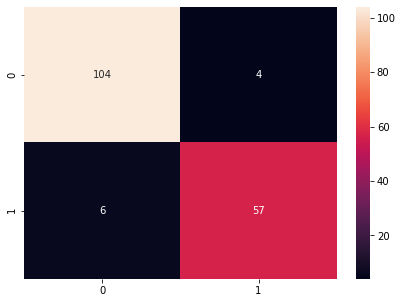

Classification report
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Accuracy of the Naive Bayes model :  94.15204678362574


In [11]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
# Predicting the Test set results
Y_pred = nb.predict(X_test)
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print('\n','Confusion matrix\n')
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print("Classification report\n",metrics.classification_report(Y_test, Y_pred))
print("Accuracy of the Naive Bayes model : ", metrics.accuracy_score(Y_test, Y_pred)*100)


 Confusion matrix



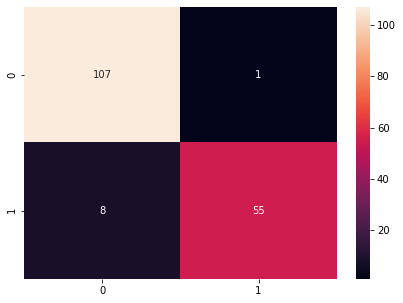

Classification report
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       108
           1       0.98      0.87      0.92        63

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy of the Support Vector model :  94.73684210526315


In [12]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
svc = SVC()
svc = CalibratedClassifierCV(svc)
svc.fit(X_train, Y_train)
# Predicting the Test set results
Y_pred = svc.predict(X_test)
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print('\n','Confusion matrix\n')
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print("Classification report\n",metrics.classification_report(Y_test, Y_pred))
print("Accuracy of the Support Vector model : ", metrics.accuracy_score(Y_test, Y_pred)*100)


 Confusion matrix



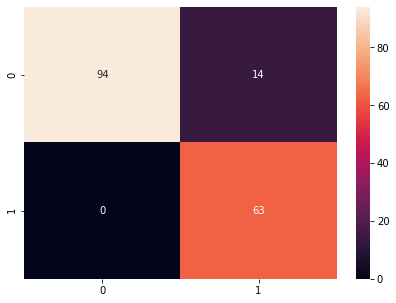

Classification report
               precision    recall  f1-score   support

           0       1.00      0.87      0.93       108
           1       0.82      1.00      0.90        63

    accuracy                           0.92       171
   macro avg       0.91      0.94      0.92       171
weighted avg       0.93      0.92      0.92       171

Accuracy of the Multi Layer Perceptron model :  91.81286549707602


In [13]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu',solver='adam', batch_size=50,alpha=1e-5,hidden_layer_sizes=(150,140,130),
random_state=42,learning_rate='adaptive')
mlp.fit(X_train, Y_train)
# Predicting the Test set results
Y_pred = mlp.predict(X_test)
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print('\n','Confusion matrix\n')
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print("Classification report\n",metrics.classification_report(Y_test, Y_pred))
print("Accuracy of the Multi Layer Perceptron model : ", metrics.accuracy_score(Y_test, Y_pred)*100)


 Confusion matrix



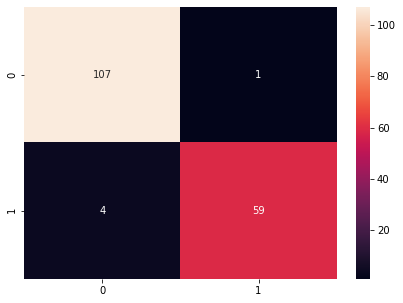

Classification report
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy of the Logistic Regression model :  97.07602339181285


In [22]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
logr = LogisticRegression(random_state = 42)
logr.fit(X_train, Y_train)
# Predicting the Test set results
Y_pred = logr.predict(X_test)

# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print('\n','Confusion matrix\n')
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print("Classification report\n",metrics.classification_report(Y_test, Y_pred))
print("Accuracy of the Logistic Regression model : ", metrics.accuracy_score(Y_test, Y_pred)*100)


 Confusion matrix



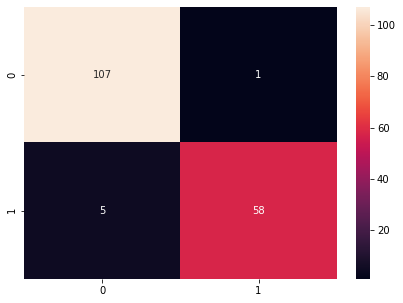

Classification report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

Accuracy of the K Nearest Neighbor model :  96.49122807017544


In [23]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, Y_train)
# Predicting the Test set results
Y_pred = knn.predict(X_test)
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print('\n','Confusion matrix\n')
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print("Classification report\n",metrics.classification_report(Y_test, Y_pred))
print("Accuracy of the K Nearest Neighbor model : ", metrics.accuracy_score(Y_test, Y_pred)*100)

In [24]:
r_probs = [0 for _ in range(len(Y_test))]
dt_probs = dt.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
svc_probs = svc.predict_proba(X_test)
mlp_probs = mlp.predict_proba(X_test)
logr_probs = logr.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)

In [25]:
dt_probs = dt_probs[:, 1]
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
svc_probs = svc_probs[:, 1]
mlp_probs = mlp_probs[:, 1]
logr_probs = logr_probs[:, 1]
knn_probs = knn_probs[:, 1]

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

In [27]:
dt_auc = roc_auc_score(Y_test, dt_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)
svc_auc = roc_auc_score(Y_test, svc_probs)
mlp_auc = roc_auc_score(Y_test, mlp_probs)
logr_auc = roc_auc_score(Y_test, logr_probs)
knn_auc = roc_auc_score(Y_test, knn_probs)

In [28]:
print('Decision Tree: AUROC = %.3f' % (dt_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('Support Vector: AUROC = %.3f' % (svc_auc))
print('Multi Layer Perceptron: AUROC = %.3f' % (mlp_auc))
print('Logistic Regression: AUROC = %.3f' % (logr_auc))
print('K Nearest Neighbor: AUROC = %.3f' % (knn_auc))

Decision Tree: AUROC = 0.944
Random Forest: AUROC = 0.996
Naive Bayes: AUROC = 0.992
Support Vector: AUROC = 0.992
Multi Layer Perceptron: AUROC = 0.996
Logistic Regression: AUROC = 0.997
K Nearest Neighbor: AUROC = 0.998


In [29]:
Y_test = [int(i) for i in Y_test]
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
dt_fpr, dt_tpr, _ = roc_curve(Y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)
svc_fpr, svc_tpr, _ = roc_curve(Y_test, svc_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(Y_test, mlp_probs)
logr_fpr, logr_tpr, _ = roc_curve(Y_test, logr_probs)
knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn_probs)

In [30]:
import matplotlib.pyplot as plt

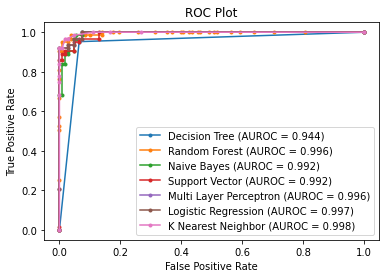

In [31]:
plt.plot(dt_fpr, dt_tpr,  marker='.', label= 'Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(svc_fpr, svc_tpr, marker='.', label='Support Vector (AUROC = %0.3f)' % svc_auc)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='Multi Layer Perceptron (AUROC = %0.3f)' % mlp_auc)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % logr_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label= 'K Nearest Neighbor (AUROC = %0.3f)' % knn_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()